<a href="https://colab.research.google.com/github/josefinasolisb/makeover_monday/blob/main/Project1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [3]:
data = '/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Project_1/sales_predictions_2023.csv'
df = pd.read_csv(data)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



* Filas = 8523
* Columnas = 12

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




* Item_Identifier (object)
* Item_Weight (float64)
* Item_Fat_Content (object)
* Item_Visibility (float64)
* Item_Type (object)
* Item_MRP (float64)
* Outlet_Identifier (object)
* Outlet_Establishment_Year (int64)  
* Outlet_Size (object)
* Outlet_Location_Type (object)
* Outlet_Type (object)
* Item_Outlet_Sales (float64)

No hay ningun duplicado.

In [5]:
df.duplicated().sum()

0


Hay valores falantes en:

* Item_Weight = 1463
* Outlet_Size = 2410

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Correcciones

In [7]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'])
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Ordinal classification

In [9]:
def count_values(df):
    object_columns = df.select_dtypes(include=['object']).columns

    value_counts_dict = {}

    for col in object_columns:
        value_counts_dict[col] = df[col].value_counts()

    return value_counts_dict



result = count_values(df)

for col, value_counts in result.items():
    print(value_counts)
    print()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

Outlet_Size
Medium    2793
Small 

Se consideraran como columnas categoricas:
* Outlet_Size
* Outlet_Location_Type
y se procedera a codificarlas

In [10]:
replacement_dictionary_1 = {'High':2,'Medium':1, 'Small':0}
df['Outlet_Size'].replace(replacement_dictionary_1, inplace=True)
df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [11]:
replacement_dictionary_2 = {'Tier 3':3,'Tier 2':2, 'Tier 1':1}
df['Outlet_Location_Type'].replace(replacement_dictionary_2, inplace=True)
df['Outlet_Location_Type']

0       1
1       3
2       1
3       3
4       3
       ..
8518    3
8519    2
8520    2
8521    3
8522    1
Name: Outlet_Location_Type, Length: 8523, dtype: int64

Identifiquen las características (X) y el objetivo (y)

In [12]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = ['Item_Identifier', 'Item_Outlet_Sales'])

Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Pipeline de preprocesamiento

In [14]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [15]:
median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

In [16]:
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [17]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [18]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78a03e238640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78a03e239300>)])

In [19]:
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78a03e238640>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78a03e239300>)])

In [20]:
train_processed = preprocessor.transform(X_train)
test_processed = preprocessor.transform(X_test)
train_processed

array([[ 0.82748547, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56664432, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12102782,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12389588, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77599877, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82748547, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [21]:
test_processed

array([[ 0.34137241, -0.77664625, -0.99881554, ...,  1.        ,
         0.        ,  0.        ],
       [-1.16913501,  0.1003166 , -1.58519423, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.38879808, -0.48299432, -1.59578435, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.12882319,  1.21832428,  1.09397975, ...,  1.        ,
         0.        ,  0.        ],
       [-1.48688696, -0.77809567, -0.36679966, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.53107507, -0.77976293,  0.11221189, ...,  1.        ,
         0.        ,  0.        ]])

In [22]:
print(np.isnan(train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(test_processed).sum().sum(), 'missing values in testing data')

0 missing values in training data
0 missing values in testing data


In [23]:
train_processed = pd.DataFrame(train_processed)
test_processed = pd.DataFrame(test_processed)

1. Modelo de regresión lineal para predecir las ventas.
* Creen un modelo de regresión lineal.

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_processed, y_train)

LinearRegression()

  * Evalúen el rendimiento del modelo basándose en r^2.

In [25]:
train_score_1 = (reg.score(train_processed, y_train)).round(2)
test_score_1 = (reg.score(test_processed, y_test)).round(2)
print("R2 Train score:", train_score_1)
print("R2 Test score:", test_score_1)

R2 Train score: 0.56
R2 Test score: 0.57


In [26]:
train_preds_1 = reg.predict(train_processed)
test_preds_1 = reg.predict(test_processed)

* Evalúen el rendimiento del modelo basándose en RECM.

In [27]:
from sklearn.metrics import mean_squared_error
mse_train_1 = mean_squared_error(y_train, train_preds_1).round(2)
mse_test_1 = mean_squared_error(y_test, test_preds_1).round(2)
print("MSE Train score:", mse_train_1)
print("MSE Test score:", mse_test_1)

MSE Train score: 1297558.14
MSE Test score: 1194341.89


In [28]:
rmse_train_1 = np.sqrt(mean_squared_error(y_train, train_preds_1)).round(2)
rmse_test_1 = np.sqrt(mean_squared_error(y_test, test_preds_1)).round(2)
print("RMSE Train score:", rmse_train_1, '$')
print("RMSE Test score:", rmse_test_1, '$')

RMSE Train score: 1139.1 $
RMSE Test score: 1092.86 $


2. La segunda tarea será crear un modelo de árbol de regresión para predecir las ventas.
* Creen un modelo simple de árbol de regresión.

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
train_score_2 = dec_tree.score(train_processed, y_train).round(2)
test_score_2 = dec_tree.score(test_processed, y_test).round(2)
print("R2 Train score:", train_score_2)
print("R2 Test score:", test_score_2)

R2 Train score: 1.0
R2 Test score: 0.2


In [32]:
train_preds_2 = dec_tree.predict(train_processed)
test_preds_2 = dec_tree.predict(test_processed)

In [33]:
from sklearn.metrics import mean_squared_error
mse_train_2 = mean_squared_error(y_train, train_preds_2).round(2)
mse_test_2 = mean_squared_error(y_test, test_preds_2).round(2)
print("MSE Train score:", mse_train_2)
print("MSE Test score:", mse_test_2)

MSE Train score: 0.0
MSE Test score: 2212868.7


In [34]:
rmse_train_2 = np.sqrt(mean_squared_error(y_train, train_preds_2)).round(2)
rmse_test_2 = np.sqrt(mean_squared_error(y_test, test_preds_2)).round(2)
print("RMSE Train score:", rmse_train_2, '$')
print("RMSE Test score:", rmse_test_2, '$')

RMSE Train score: 0.0 $
RMSE Test score: 1487.57 $


3. Acaban de intentar 2 diferentes modelos en el conjunto de datos. Deben determinar qué modelo implementar.
* En general, ¿qué modelo recomiendan?

Se recomienda usar el modelo de regresión lineal.

* Justifiquen su recomendación.

Se obtuvieron 3 metricas de regresion para analizar el modelo de regresion lineal y el modelo de arbol de regresion. En ambos modelos se calcularon los scores (puntajes) de R^2 y RECM para los datos de train (entrenamiento) y test (prueba).

Para el modelo de regresion lineal:
  * R2 Train score: 0.56
  * R2 Test score: 0.57

  * RMSE Train score: 1139.1 $

  * RMSE Test score: 1092.86 $

Para el modelo de arboles de regresion:
* R2 Train score: 1.0
* R2 Test score: 0.2
* RMSE Train score: 0.0 $

* RMSE Test score: 1487.57 $

Aunque el modelo de árboles de regresión tiene un R2 Train perfecto (1), su R2 Test es notablemente más bajo. Esto significa que el modelo esta sobreajustado en los datos de Test y que no se esta logrando adaptar bien a datos nuevos. A parte de esto, el RMSE Test del modelo de arboles es significativamente más alto que el del modelo de regresión lineal (aprox. 400 $ de diferencia). Esto reafirma que las predicciones del modelo de árboles de regresión son menos precisas en los datos de prueba.

En base a este analisis, se elige recomendar el modelo de regresion lineal. No obstante, se debe tener en cuenta que que los valores de R2 para test y train en el modelo de regresion lineal, a pesar de ser muy cercanos entre ellos, son menores a 0.7. Esto indica que el modelo aun debe ser mejorado, es probable que los datos pueden contener una cantidad significativa de ruido que el modelo no puede explicar. Por lo tanto, se recomienda ajustar parametros dentro del modelo de regresion lineal o buscar modelos de regresion mas adecuados para este grupo de datos.




4. Para concluir este proyecto, deben preparar una presentación ejecutiva (no técnica) sobre el proyecto.
* Incluyan dos ideas del análisis con el apoyo de imágenes de calidad adecuadas para la “presentación de informes”.

<ipython-input-39-e4866482a57f>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


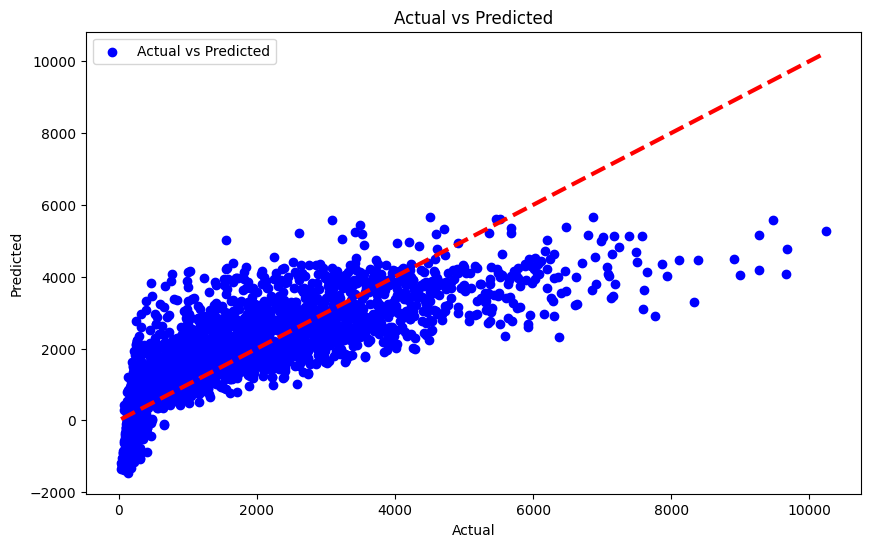

In [39]:
import matplotlib.pyplot as plt

predicted = reg.predict(test_processed)

# Step 2: Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend(loc='upper left')
plt.show()

<ipython-input-41-e51f8d6e1aca>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')  # Diagonal line


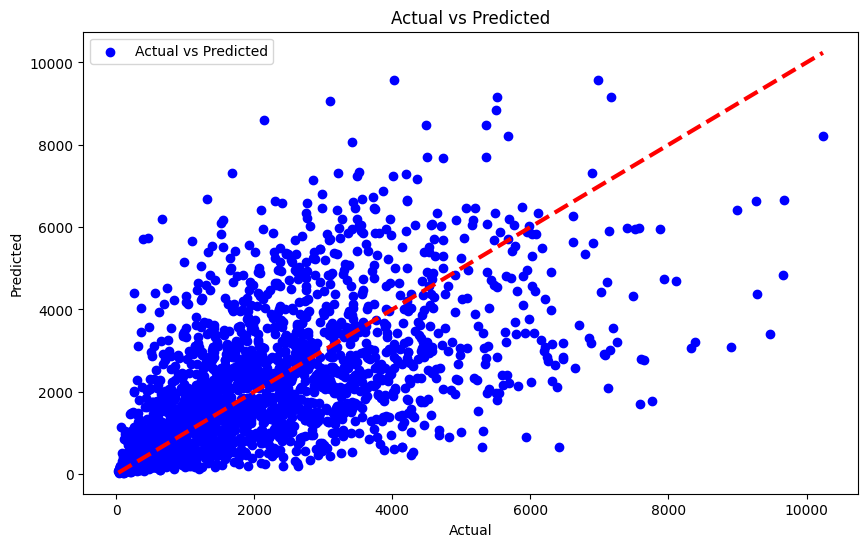

In [41]:
predicted = dec_tree.predict(test_processed)

# Step 2: Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend(loc='upper left')
plt.show()